In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Airlines.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB
None


In [10]:
df.drop(['id'], axis=1, inplace=True)

In [11]:
df.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

<Axes: >

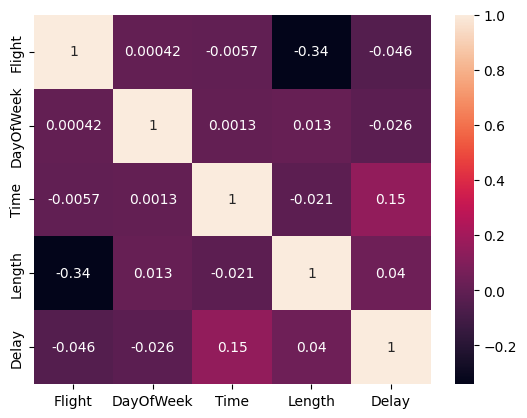

In [14]:
df1 = df[['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']]
sns.heatmap(df1.corr(), annot=True)

<Axes: xlabel='Flight', ylabel='Count'>

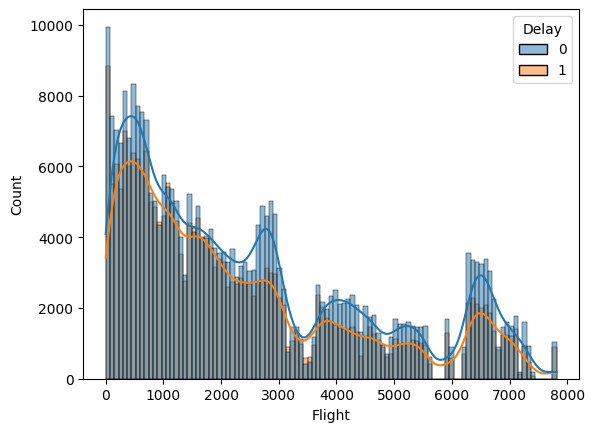

In [15]:
sns.histplot(data=df1, x='Flight', hue='Delay', kde=True)

<Axes: xlabel='Time', ylabel='Count'>

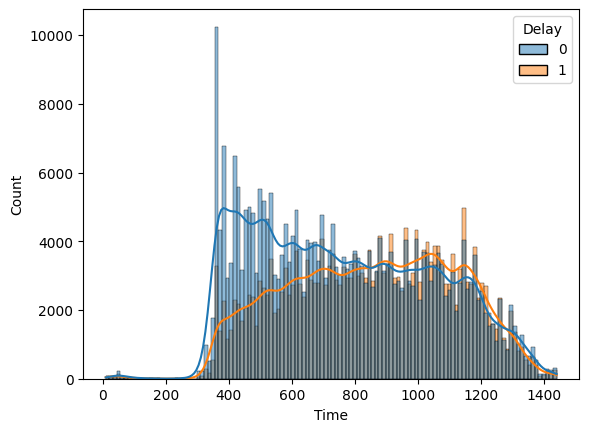

In [16]:
sns.histplot(data=df1, x='Time', hue='Delay', kde=True)

<Axes: xlabel='Length', ylabel='Count'>

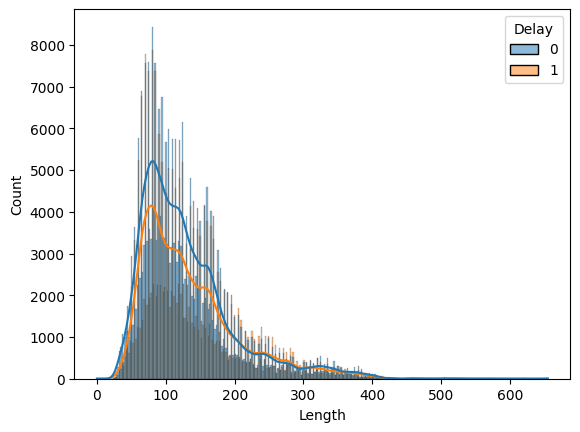

In [17]:
sns.histplot(data=df1, x='Length', hue='Delay', kde=True)

<Axes: xlabel='Airline', ylabel='count'>

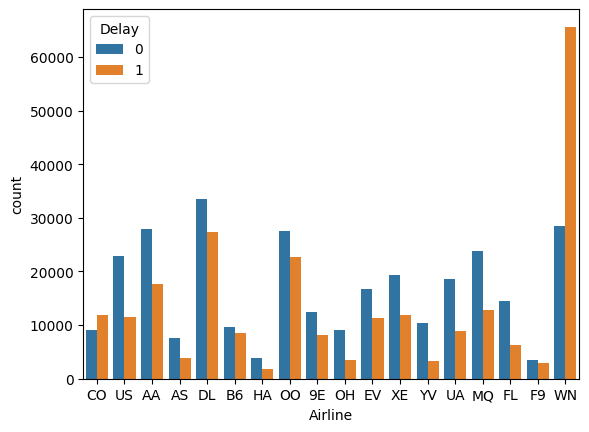

In [18]:
sns.countplot(data=df, x='Airline', hue='Delay')

<Axes: xlabel='AirportFrom', ylabel='count'>

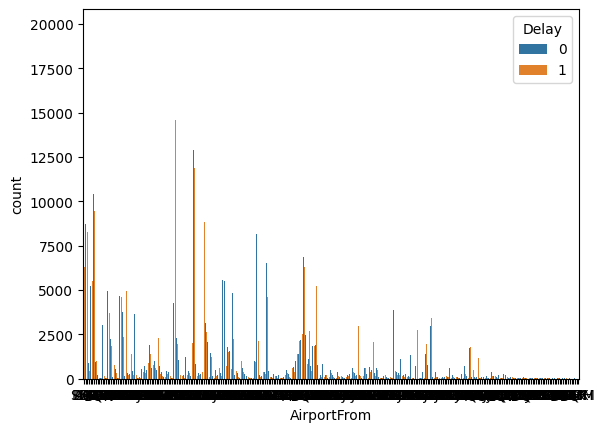

In [19]:
sns.countplot(data=df, x='AirportFrom', hue='Delay')

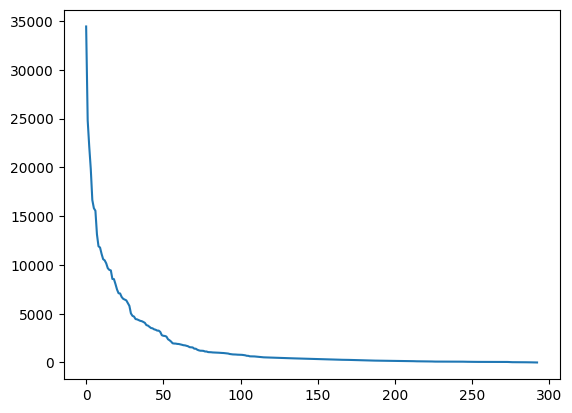

In [20]:
airfrom = df['AirportFrom'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

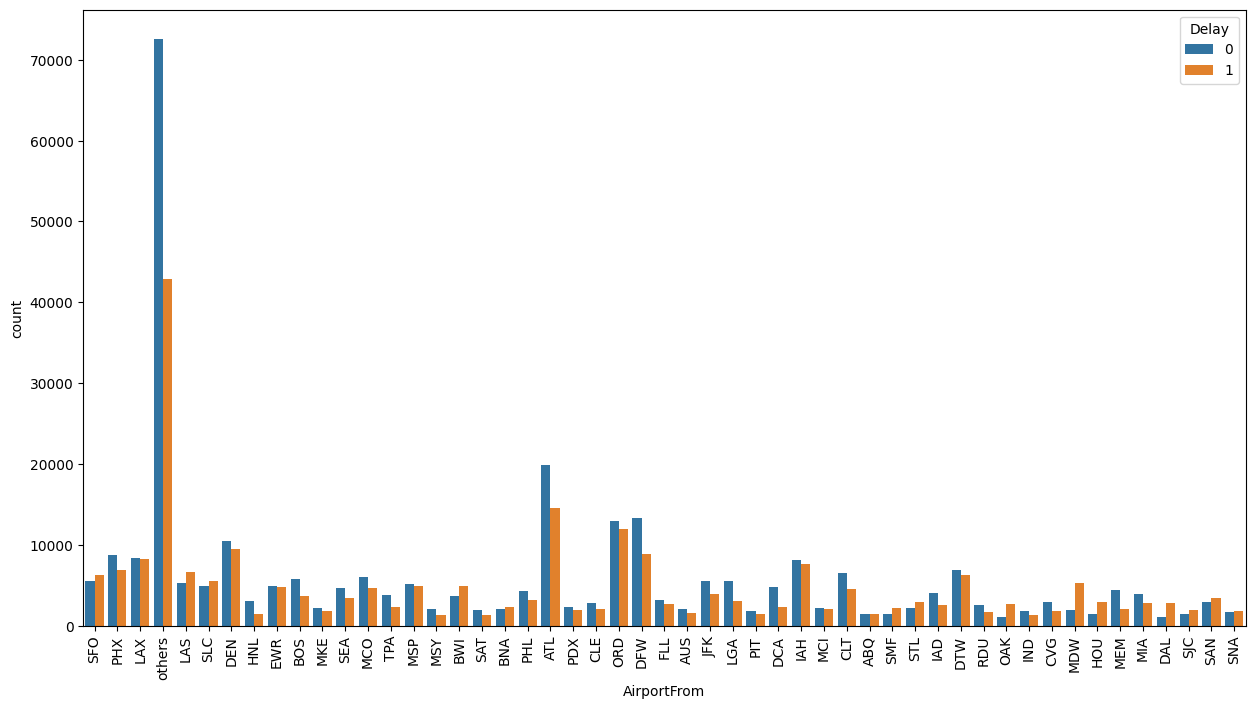

In [22]:
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='count'>

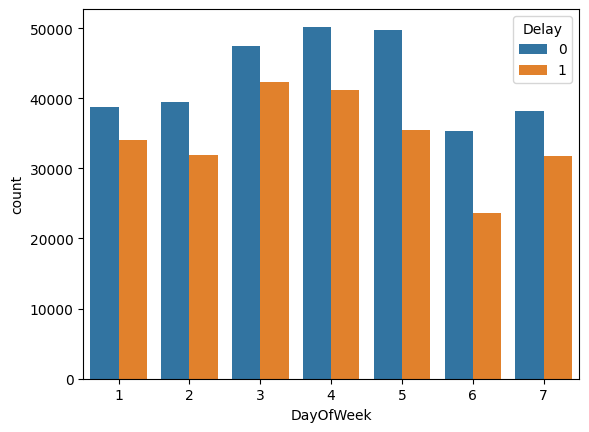

In [23]:
sns.countplot(data=df, x='DayOfWeek', hue='Delay')

In [36]:
X_text = df[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
X_num = df.drop(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], axis=1)

In [37]:
X_text = pd.get_dummies(X_text, drop_first=True)

In [32]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_text], axis=1)
y = df['Delay']

In [39]:
X.head()

,Flight,Time,Length,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,-1.044258,-2.833092,1.038237,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.420778,-2.833092,1.280689,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.013509,-2.815110,0.467761,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.018415,-2.815110,0.895618,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.122133,-2.779144,0.995451,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV